In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.patches as patches
import matplotlib.lines as mlines
from scipy import stats

In [3]:
df = pd.read_csv("fichFinalAtualizado.csv", sep=';', encoding='latin-1')
df.head()

,Publicado em,Titulo,Autores,Ano,Instituicao,Problema,Contribuicao,Resultado,Fluxo,Metodologia,...,Metricas,Resultado Valores,Divisao Avaliacao,n Imagens,New comments,Outa,Outa1,AutoresNome,NomeeANo,ProblemaGrupo
0,Artigo em Periódico,Deep Learning of Texture and Structural Featur...,310,2017,Old Dominion University,Trabalhos que utilizam sempre comparações biná...,Os autores propõem uma característica de textu...,O sistema apresentou dois modelos para detecçã...,Dataset - Preprocessamento - Extração de carac...,"São apresentados dois modelos, um utilizando L...",...,Accuracy,Model 1: 56.6% Validation ACC - 73.3% CaDDemen...,10fold cross validation e CADDementia,504[171-232-101],sMRI,310,NaN,Dolph et al.,Dolph et al. (2017),Utilizar apenas comparações binárias dos estágios
1,Artigo em Proceedings,FuseMe: Classification of sMRI images by fusio...,321,2017,University of Bordeaux,A apresentação da necessidade de uso de outras...,Os autores propõem uma abordagem multiprojeção...,O sistema realiza diferentes comparações permu...,Alinha imagens - preprocessa - AAL para hipoca...,"Os autores propõem um modelo complexo, que dev...",...,"Accuracy, Specificity, Sensitivity","Ac: 71,61% Sp: 70,61, Se: 72,74","Train,Test",815[228-399-188],sMRI,321,NaN,310,310 (2017),Necessidade da combinação de informações
2,Artigo de Conferencia,Automatic Detection and Classification of Alzh...,386,2013,University of Bridgeport,"Segundo os autores, existe a dificuldade de en...",Os autores propõem um método matemático e de p...,NaN,Pre-processing - PCA - Projection on eigenface...,Primeiro as imagens são normalizadas de forma ...,...,Accuracy,"Ac: 89,22%","Train,Test",457,sMRI,386,para CDR,Mohmood and Ghimire,Mohmood and Ghimire (2013),Dificuldade de diferenciar estágios intermediá...
3,Book Chapter,A Feasibility Study of Using the NeuCube Spiki...,426,2015,Auckland University of Technology,Usar um tipo de estrutura diferente para avali...,Os autores apresentam uma ideia utilizando Neo...,"Indices extremamente elevados de acurácia, ser...",Preprocessing - NeoCube 3D - data extraction -...,preprocessa a imagem aplicando filtros de band...,...,"Accuracy, Specificity, Sensitivity",Todos 100%,random sub-sampling validation and LOOCV,42[21-0-21],EEG,426,NaN,Capecci et al.,Capecci et al. (2015),Qual tipo de estrutura utilizar
4,Artigo de Conferencia,Deep Learning in the EEG Diagnosis of Alzheime...,431,2015,Tongji University,Tipo de estrutura na deep learning para ajudar...,Alteração na estrutura deep learning para capt...,"além da alteração da estrutura, todos os casos...",EEG - High level of features - several high le...,"Inicialmente foi escolhido RBM para treinamento,",...,Accuracy,Ac: 84%,"Train,Test",30[15-0-15],EEG,431,NaN,Zhao and He,Zhao and He (2015),Qual tipo de estrutura utilizar


In [5]:
#df[df['Ranking/Neural'] == 'Neural']
print(df.columns)
df[df['Ranking/Neural'] == 'Neural'][['Autores','Imagem','ROI']]

Index(['Publicado em', 'Titulo', 'Autores', 'Ano', 'Instituicao', 'Problema',
       'Contribuicao', 'Resultado', 'Fluxo', 'Metodologia', 'Relevancia',
       'Imagem', 'Dataset', 'Ranking/Neural', 'ROI', 'Metricas',
       'Resultado Valores', 'Divisao Avaliacao', 'n Imagens', 'New comments',
       'Outa', 'Outa1', 'AutoresNome', 'NomeeANo', 'ProblemaGrupo'],
      dtype='object')


,Autores,Imagem,ROI
0,310,MRI,Hipocampo
1,321,MRI,Hipocampo
2,386,MRI,Whole Brain
3,426,EEG,Whole Brain
4,431,EEG,Whole Brain
5,452,MRI,Hipocampo
6,463,"MRI, PET",Other Anatomical
7,481,MRI,Whole Brain
10,501,MRI,Whole Brain
11,525,MRI,Other Anatomical


In [3]:
df['Instituicao'].value_counts().head(8)

Shanghai Jiao Tong University                 5
University of Bordeaux                        5
University of North Carolina - Chapel Hill    4
University of Sydney                          3
Shanghai University                           2
Old Dominion University                       2
Ss. Cyril and Methodius University            2
National Ciao Tung University                 1
Name: Instituicao, dtype: int64

In [4]:
df.sort_values('Instituicao')

,Publicado em,Titulo,Autores,Ano,Instituicao,Problema,Contribuicao,Resultado,Fluxo,Metodologia,...,Dataset,Ranking/Neural,ROI,Metricas,Resultado Valores,Divisao Avaliacao,n Imagens,New comments,Outa,Outa1
29,Anais Conferência,Deep Learning based Classification of FDG-PET ...,200,2017,Arizona State University,Eficácia do PET sozinho,Novos métodos de análise probablisitca de comp...,Aumento de acurácia quando comparado com outro...,Raw PET image - normalized PET image - Pooling...,NaN,...,ADNI,Neural,NaN,F1-Score,NaN,10-fold cross validation,668[186-178-158-146],NaN,200,NaN
3,Book Chapter,A Feasibility Study of Using the NeuCube Spiki...,426,2015,Auckland University of Technology,Usar um tipo de estrutura diferente para avali...,Os autores apresentam uma ideia utilizando Neo...,"Indices extremamente elevados de acurácia, ser...",Preprocessing - NeoCube 3D - data extraction -...,preprocessa a imagem aplicando filtros de band...,...,Own,Neural,Eletrodos,"Accuracy, Specificity, Sensitivity",Todos 100%,random sub-sampling validation and LOOCV,42[21-0-21],EEG,426,NaN
12,NaN,Automatic Recognition of Mild Cognitive Impair...,715,2017,Chinese Academy of Sciences,"a dificuldade em encontrar MCI, visto que dive...",Apresentar uma variação da CNN com decomposiçã...,NaN,Feature Map - CNN,"o kernel de convoluçao, bem como a amostra de ...",...,"ADNI, LIDC, OASIS",Neural,No ROI,"F-measure, Precision, Recall, Accuracy",F: 89.4 Ac: 90.6 Rec:92.8 Prec: 87.2,train-validation-test,629[229-400-0],sMRI,715,NaN
45,Anais Conferência,Multimodal learning using Convolution Neural N...,296,2017,Chonnam National University,Pre-detecção doença de Alzheimer's,Designed a pattern classification system based...,Method improve highly the classification accur...,Input(MRI/PET) - CNN layer - Pooling layer - F...,NaN,...,ADNI,Neural,NaN,Accuracy,Acc: 90% (NC/AD),"Train(80), Test(10), Validation(10)",317[172-0-145],NaN,296,NaN
7,NaN,ANN based Dementia Diagnosis using DCT for Bra...,481,2013,College of Engg. Pandharpur,Doença de Huntinghton muito parecido com o alz...,apresenta um método com aplicações matemáticas...,NaN,Data Acquisition - Histogram - Cosine Transfor...,"inicialmente, o histograma das intensidades sã...",...,AANLIB,Neural,No ROI,"Accuracy, Specificity, Sensitivity",100,"Train,Test",120,sMRI,481,NaN
43,Artigo em Periódico,Alzheimer disease detection from structural MR...,282,2018,"Hindusthan College of Engineering and Technology,",Pre-detecção doença de Alzheimer's,To detect and to remove the suspicious samples...,"Acurácia em torno de 98.63%, 95.4%, 96.4% (in ...",Data set - Normalização - Extração de ROI - Fe...,NaN,...,ADNI,Neural,NaN,Accuracy,"accuracy 98.63%, 95.4%, 96.4% in terms of clas...","Train, Test",509[162-210-137],NaN,282,NaN
16,NaN,Elman neural network for the early identificat...,D55,2014,IRCCS Centro Neurolesi,A necessidade a algoritmos que identifique o a...,"um algoritmo que engloba o uso de wavelet, ann...",um método que supera 84%,Filtering - Feature extraction - calculate MF ...,NaN,...,Own,Neural,NO ROI,Accuracy,84%,"Train,Test",43,NaN,D55,NaN
15,NaN,EEG discrimination with artificial neural netw...,D51,2013,Instituto Politécnico de Bragança,A ineficâcia de algoritmos atuais para detecta...,Um algoritmo que utiliza sinais EEG e potencia...,NaN,Signal Processing - Feature Extraction - Class...,"Primeiro, é aplicado a Transformada de Fourier...",...,Own,Neural,NO ROI,Accuracy,96.13%,TrainRP,34[14-0-20],NaN,D51,NaN
11,NaN,Deep Ensemble Sparse Regression Network for Al...,525,2016,Korea University,analisar um conjunto grande de dados quando só...,propor um modelo que relacione regressão logis...,NaN,Preprocessing-segmentation-parcellation-logist...,Os autores preprocessam a imagem usando resamp...,...,ADNI,Neural,"GM,WM,CSF","Accuracy, Specificity, Sensitivity","Ac: 79.25 Sp: 80,66 Se: 76,88",10-fold cross-validation,805[226-226-167-186],sMRI,525,"sMCI,pMCI"
5,NaN,Deep Spectral-Based Shape Features for Alzheim...,452,2016,"Medical, 

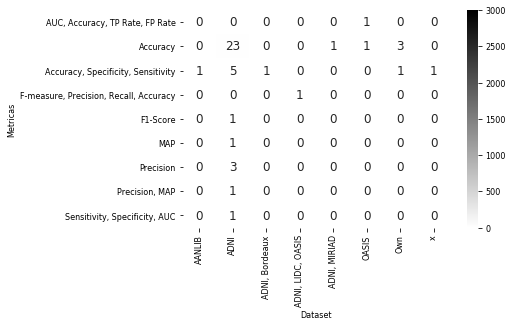

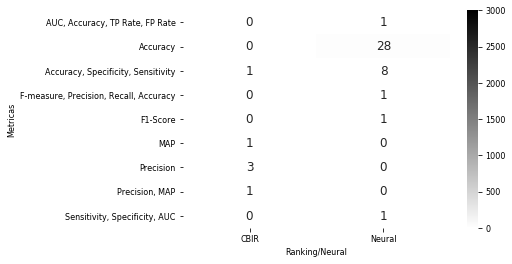

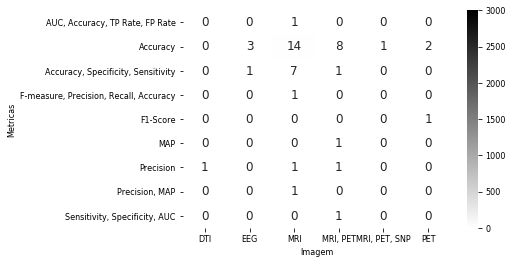

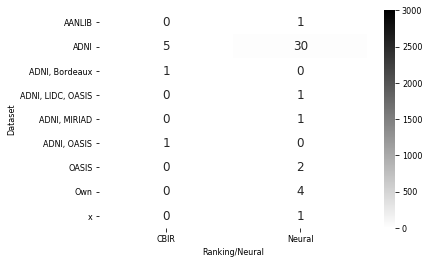

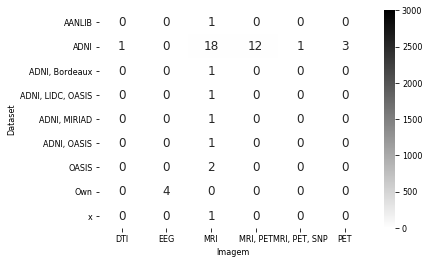

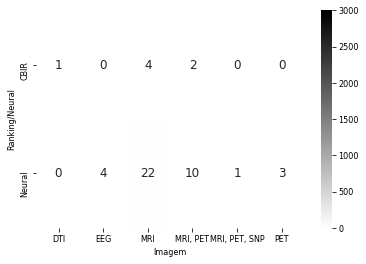

In [52]:
#creating manually a pairplot
dataForIteration = ['Metricas', 'Dataset', 'Ranking/Neural', 'Imagem']
ax = plt.figure(figsize=(20, 12))
counter = 1
for iidx,i in enumerate(dataForIteration):
    for j in dataForIteration[iidx+1:]:
        plt.figure()
        sns.heatmap(pd.crosstab(df[i],df[j]),cmap='binary',,annot=True,  annot_kws={"size":12})
        plt.axis('on')
        plt.savefig('relashion_'+ i.replace('/','-') +'_'+ j.replace('/','-') +'.eps',transparent=True, bbox_inches='tight', pad_inches=0,square=True)
        #plt.subplot(4, 4, counter)
        #if i != j:
            #if (counter == 13):
            #    sns.heatmap(pd.crosstab(df[i],df[j]),cmap='binary',annot=True)
            #elif( counter in (1,5,9)):
            #    sns.heatmap(pd.crosstab(df[i],df[j]),cmap='binary',xticklabels=False,annot=True)
            #elif(counter in (14,15,16)):
            #    sns.heatmap(pd.crosstab(df[i],df[j]),cmap='Greys', yticklabels=False,annot=True)
            #else:
            #    sns.heatmap(pd.crosstab(df[i],df[j]),cmap='Greys',xticklabels=False, yticklabels=False,annot=True)
        ##else:
            ##plt.hist(df[i])
        #counter = counter + 1
##sns.heatmap(pd.crosstab(df['Dataset'],df['Imagem']),cmap='coolwarm')


#for i in range(1, 7):

    #plt.text(0.5, 0.5, str((2, 3, i)),
    #         fontsize=18, ha='center')



<Container object of 9 artists>

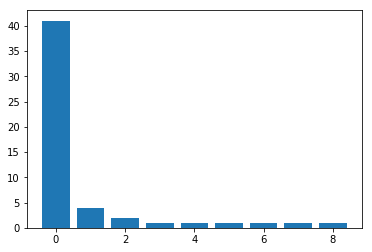

In [40]:
plt.bar(range(len(df['Dataset'].value_counts().index)),df['Dataset'].value_counts())

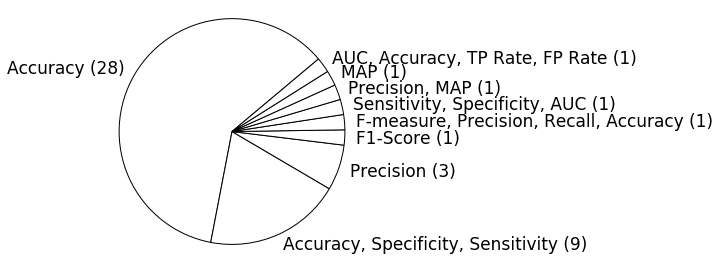

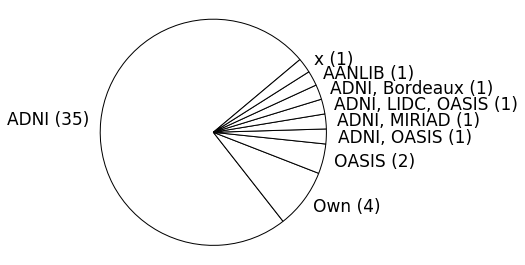

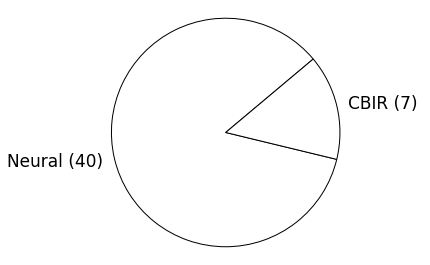

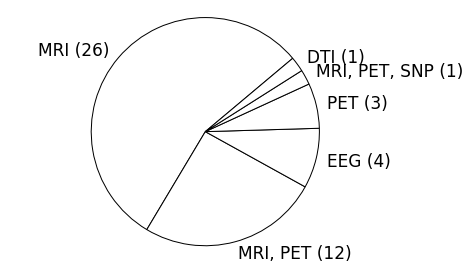

In [5]:
attribute = 'Metricas'
#Metricas Dataset Ranking/Neural Imagem
def make_disp(label,value):
    return label+' ('+value+')'

dataForIteration = ['Metricas', 'Dataset', 'Ranking/Neural', 'Imagem']

for data in dataForIteration:
    plt.figure()
    colors1 = np.array([[1, 1, 1],[0, 0, 0],[0.5, 0.5, 0.5],[0.2, 0.2, 0.2],
                        [0.8, 0.8, 0.8],[0.4, 0.4, 0.4],[0.7, 0.7, 0.7],[0.3, 0.3, 0.3],
                        [0.6, 0.6, 0.6],[0.1, 0.1, 0.1],[0.9,0.9,0.9]])

    labels = df[data].value_counts().keys()
    sizes = df[data].value_counts()

    #patterns = ('.','-', '+', 'x', '\\', '*', 'o', 'O','o','\\')
    patches, texts = plt.pie(sizes ,labels = labels + ' (' + sizes.astype(str)+')',startangle=40,colors=['white']*len(sizes))
    #for patch, pattern in zip(patches,patterns):
       # patch.set_hatch(pattern)
    #    patch.set_linewidth(1)
    #    patch.set_edgecolor('black')

    for patch in patches:
        patch.set_linewidth(1)
        patch.set_edgecolor('black')
    plt.axis('equal')
    plt.tight_layout()
    #plt.show()
    plt.axis('on')
    plt.rcParams['font.size'] = 17.0
    plt.tight_layout()
    plt.savefig('pizza'+data.replace('/','-')+'.jpg',transparent=True, bbox_inches='tight', pad_inches=0)
    

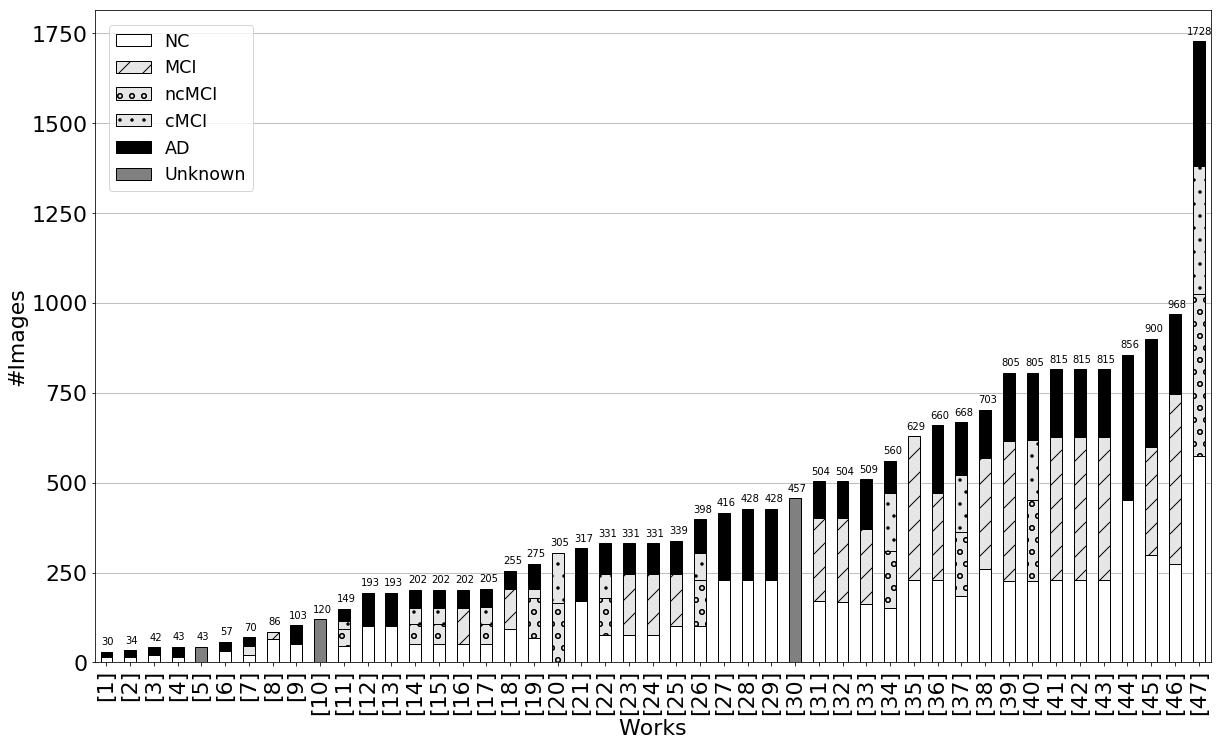

In [3]:
#plot qtdImages

level_nc = []
level_mci = []
level_ad = []
level_ncmci = []
level_cmci = []
unknown = []
total_value = []

for line in df['n Imagens']:
    cropped = line.split('[')
    if len(cropped) == 1:
        val_nc = val_mci = val_ad = val_ncmci = val_cmci = 0
        val_ukn= int(cropped[0])
        
        #print(val_nc,"   ",val_mci,"   ",val_ad,"   ",val_ncmci,"   ",val_cmci,"   ",int(val_ukn[0]),'\n')
    else:
        stages = cropped[1].replace(']','').split('-')
        if len(stages) == 3:
            val_nc = int(stages[0])
            val_mci = int(stages[1])
            val_ad = int(stages[2])
            val_ncmci = val_cmci = val_ukn = 0
            #print(val_nc,"   ",val_mci,"   ",val_ad,"   ",val_ncmci,"   ",val_cmci,"   ",val_ukn,'\n')
        else:
            val_nc = int(stages[0])
            val_ncmci = int(stages[1])
            val_cmci = int(stages[2])
            val_ad = int(stages[3])
            val_mci = val_ukn = 0
            #print(val_nc,"   ",val_mci,"   ",val_ad,"   ",val_ncmci,"   ",val_cmci,"   ",val_ukn,'\n')
    val_total = val_nc+val_mci+val_ad+val_ncmci+val_cmci+val_ukn
    level_nc.append(val_nc)
    level_mci.append(val_mci)
    level_ad.append(val_ad)
    level_ncmci.append(val_ncmci)
    level_cmci.append(val_cmci)
    unknown.append(val_ukn)
    total_value.append(val_total)
    

level_nc    = np.reshape(np.array(level_nc),(len(level_nc),1))
level_mci   = np.reshape(np.array(level_mci),(len(level_nc),1))
level_ad    = np.reshape(np.array(level_ad),(len(level_nc),1))
level_ncmci = np.reshape(np.array(level_ncmci),(len(level_nc),1))
level_cmci  = np.reshape(np.array(level_cmci),(len(level_nc),1))
unknown     = np.reshape(np.array(unknown),(len(level_nc),1))
total_value = np.array(total_value)

y = np.concatenate((level_nc,level_mci,level_ncmci,level_cmci,level_ad,unknown),axis=1)
dfx = pd.DataFrame(y,columns=['NC','MCI','ncMCI','cMCI','AD','Unknown'])
dfx = dfx.reindex(dfx.sum(axis=1).sort_values().index)


ax = plt.figure(figsize=(20, 12)).add_subplot(111)
dfx.plot(ax=ax,kind='bar',color='white', stacked=True,zorder=3)
#ax.set_yscale('log',basey=2)
bars = ax.patches
patterns =(' ', '/','o','.',' ',' ')

#colors  = ('red','blue','green','yellow','purple','gray') 
colors = np.array([[1, 1, 1],[0.9, 0.9, 0.9],[0.9, 0.9, 0.9],[0.9, 0.9, 0.9],[0, 0, 0],[0.5, 0.5, 0.5]])
hatches = [p for p in patterns for i in range(len(dfx))]
colors  = [p for p in colors for i in range(len(dfx))]

for bar, hatch, color in zip(bars, hatches, colors):
    bar.set_edgecolor(color='black')
    bar.set_facecolor(color=color)
    bar.set_hatch(hatch)

total_value.sort()    
for i in range(0,len(level_cmci)):
    label = str(total_value[i])
    if(total_value[i]-10**2 < 0):
        plt.text(i-0.2,total_value[i]+20,label)
    elif(total_value[i]-10**3 < 0):
        plt.text(i-0.3,total_value[i]+20,label)
    else:
        plt.text(i-0.5,total_value[i]+20,label)
ax.yaxis.grid()
ax.legend(loc='center right', bbox_to_anchor=(0.15, 0.85), fontsize=17.5)
p = ax.set_xticklabels((('['+str(x)+']') for x in range(1,len(level_mci)+1)))
ax.set_xlabel('Works', fontsize=22)
ax.set_ylabel('#Images', fontsize=22)
ax.tick_params(labelsize=22)    

plt.axis('on')
plt.savefig('sizeDatasets.jpg',transparent=True, bbox_inches='tight', pad_inches=0)

In [137]:
median = np.median(total_value)
mode = int(stats.mode(total_value).mode)
avg = total_value.mean()
print(median, ' ', mode, ' ', avg)

331.0   202   421.893617021


In [89]:
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Paragraph
from reportlab.lib.styles import ParagraphStyle
from reportlab.lib.enums import TA_JUSTIFY,TA_LEFT,TA_CENTER,TA_RIGHT
doc = SimpleDocTemplate("Alzheimers Report.pdf", pagesize=letter)

elements = []
p = ParagraphStyle('parrafos',
                   fontSize = 10,
                   fontName="Times-Roman")
pred = ParagraphStyle('parrafos',
                   fontSize = 10,
                   fontName="Times-Roman",
                   textColor=colors.red)
p1 = ParagraphStyle('parrafos',
                   fontSize = 12,
                   fontName="Times-Roman",
                   alignment = TA_CENTER)
pfoot = ParagraphStyle('parrafos',
                   fontSize = 9,
                   fontName="Times-Roman",
                   alignment = TA_CENTER)

#t=Table(data)
#t.setStyle(TableStyle([('BACKGROUND',(1,1),(-2,-2),colors.green),
#                       ('TEXTCOLOR',(0,0),(1,-1),colors.red)]))
matrix = np.array(df)
count = 0

for line in matrix:
    
    elements.append(Paragraph("<br/>"+str(line[1]) + " - " + str(line[3]) + "<br/>", p1))
    elements.append(Paragraph(str(line[4]) + "<br/>", pfoot))
    
    elements.append(Paragraph("Problema: ",pred))
    elements.append(Paragraph(str(line[5]) + "<br/>", p))
    elements.append(Paragraph('Contribuição: ',pred))
    elements.append(Paragraph(str(line[6]) + "<br/>", p))
    elements.append(Paragraph('Resultado: ',pred))
    elements.append(Paragraph(str(line[7]) + "<br/>", p))
    elements.append(Paragraph('Fluxo: ',pred))
    elements.append(Paragraph(str(line[8]) + "<br/>", p))
    elements.append(Paragraph('Metodologia: ',pred))
    elements.append(Paragraph(str(line[9]) + "<br/>", p))    
    elements.append(Paragraph('Relevancia: ',pred))
    elements.append(Paragraph(str(line[10]) + "<br/>", p))
    elements.append(Paragraph('Imagem: ',pred))
    elements.append(Paragraph(str(line[11]) +', Dataset: '+line[12] + "<br/>", p))
    elements.append(Paragraph('Ranking/Neural: ',pred))
    elements.append(Paragraph(str(line[13]) + "<br/>", p))
    elements.append(Paragraph('ROI: ',pred))
    elements.append(Paragraph(str(line[14]) + "<br/>", p))
    elements.append(Paragraph('Metricas: ',pred))
    elements.append(Paragraph(str(line[15]) + "<br/>", p))
    elements.append(Paragraph('Resultado Valores: ',pred))
    elements.append(Paragraph(str(line[16]) + "<br/>", p))
    elements.append(Paragraph('Divisão Avaliação: ',pred))    
    elements.append(Paragraph(str(line[17]) + "<br/>", p))
    #break;
# write the document to disk
doc.build(elements)

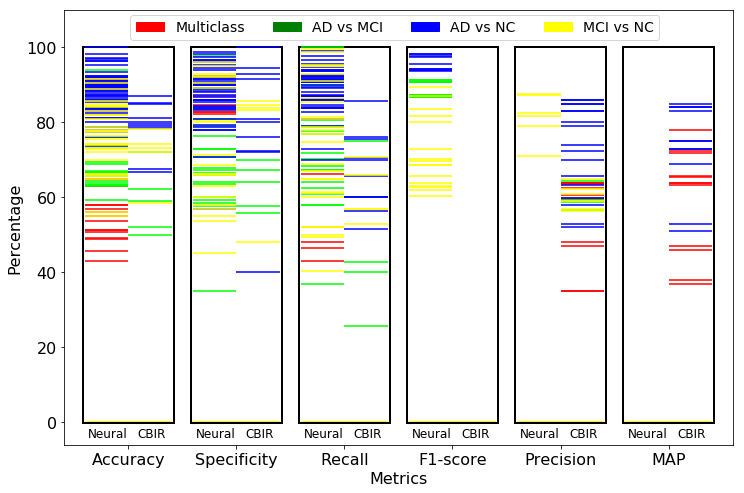

In [75]:
plt.rcParams['font.size'] = 8.0

#importing list of results and convert nan to 0
df_results = pd.read_csv("resultadosPlotAtualizado.csv", sep=';', encoding='latin-1')
df_results.fillna(value=0,inplace=True)
mat_QttResults = np.array(df_results)
mat_QttResults = np.nan_to_num(mat_QttResults)

#create a list of indexes for ranking and neural
neural_idx = list()
ranking_idx = list()
for ndx, member in enumerate(mat_QttResults[0][2:]):
    if member == 1.:
        neural_idx.append(ndx);
    else:
        ranking_idx.append(ndx);

mat_QttResults = mat_QttResults[1:,2:]

neural_results =  mat_QttResults[:,neural_idx]
ranking_results =  mat_QttResults[:,ranking_idx]

#data1 = mat_QttResults

colors = np.array([[1, 0, 0],[0, 1, 0],[0, 0, 1],[1, 1, 0],
                    [1, 0, 0],[0, 1, 0],[0, 0, 1],[1, 1, 0],
                    [1, 0, 0],[0, 1, 0],[0, 0, 1],[1, 1, 0],
                    [1, 0, 0],[0, 1, 0],[0, 0, 1],[1, 1, 0],
                    [1, 0, 0],[0, 1, 0],[0, 0, 1],[1, 1, 0],
                    [1, 0, 0],[0, 1, 0],[0, 0, 1],[1, 1, 0]
                   ])


lineoffsets1 = np.array([-16, -16, -16, -16, 
                         -11, -11, -11, -11,
                         -6, -6, -6, -6, 
                         -1, -1, -1, -1,  
                         4, 4, 4, 4, 
                         9, 9, 9, 9
                        ])

lineoffsets2 = np.array([-14, -14, -14, -14, 
                         -9, -9, -9, -9,
                         -4, -4, -4, -4, 
                         1, 1, 1, 1,  
                         6, 6, 6, 6, 
                         11, 11, 11, 11
                        ])
linelengths = np.ones(24)*2

fig, ax = plt.subplots(1,figsize=(12,8))


# Add the patch to the Axes

plt.eventplot(neural_results, colors=colors, lineoffsets=lineoffsets1,
                    linelengths=linelengths, orientation='vertical')
plt.eventplot(ranking_results, colors=colors, lineoffsets=lineoffsets2,
                    linelengths=linelengths, orientation='vertical')

for i in range(6):
    rect = patches.Rectangle(((i*5-17.1),-0.2),4.2,100.4,linewidth=2,edgecolor='k',facecolor='none')
    plt.text(5*i-16.9,-4,'Neural',fontsize=12)
    plt.text(5*i-14.6,-4,'CBIR',fontsize=12)
    ax.add_patch(rect)
    ln = patches.mlines.Line2D([(i*5-17.1),(i*5-12.9)],[-0.2,-0.2],2,color='k')
    ax.add_line(ln)
    #fig.patches.extend([plt.Rectangle(((i*5-17),0),4,100,linewidth=2,edgecolor='k',facecolor='none')])

#ax.legend(loc='center right', bbox_to_anchor=(1, 1), ncol=6, fontsize=17.5)
p = ax.set_xticklabels("a Accuracy Specificity Recall F1-score Precision MAP".split(" "))
ax.set_xlabel('Metrics', fontsize=16)
ax.set_ylabel('Percentage', fontsize=16)
ax.tick_params(labelsize=16)    
plt.xlim(-18, 13) 
plt.ylim(-6,110)
ax.legend(handles=[ patches.Patch(color='red', label='Multiclass'),
                     patches.Patch(color='green', label='AD vs MCI'),
                     patches.Patch(color='blue', label='AD vs NC'),
                     patches.Patch(color='yellow', label='MCI vs NC')
                   ],loc='center right', bbox_to_anchor=(0.9, 0.96), ncol=6, fontsize=14)
#ax.legend(loc='center right', bbox_to_anchor=(1, 1), ncol=6, fontsize=17.5)
#plt.show()
plt.axis('on')
plt.savefig('results.jpg',transparent=True, bbox_inches='tight', pad_inches=0)

In [76]:
df_results

,Work,Work.1,310.a,310.b,321.a,321.b,321.c,386,426,431,...,240.c,240.d,240.e,240.f,240.g,240.h,242,260,277,278
0,What,Method,1.0,1.0,1.00,1.00,1.00,1.00,1.0,1.0,...,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.0,1.0
1,Accuracy,MultiClass,51.4,58.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,91.85,0.0,0.0
2,Accuracy,AD vs MCI,0.0,0.0,69.53,59.38,63.28,0.00,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,93.89,0.0,0.0
3,Accuracy,AD vs NC,0.0,0.0,91.41,89.06,89.84,89.22,100.0,86.0,...,93.55,87.55,89.64,96.27,96.27,97.27,0.0,98.33,0.0,0.0
4,Accuracy,MCI vs NC,0.0,0.0,65.62,66.25,66.25,0.00,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,91.67,0.0,0.0
5,Specificity,MultiClass,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0
6,Specificity,AD vs MCI,0.0,0.0,67.19,57.81,64.06,0.00,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,97.78,0.0,0.0
7,Specificity,AD vs NC,0.0,0.0,89.06,85.94,85.94,0.00,0.0,0.0,...,96.67,85.50,90.14,96.67,98.33,97.50,96.0,98.89,0.0,0.0
8,Specificity,MCI vs NC,0.0,0.0,66.25,71.25,68.75,0.00,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,63.0,92.22,0.0,0.0
9,Recall,MultiClass,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0


In [77]:
df2 = np.array(df_results)
df2 = pd.DataFrame(df2[1:],columns=df_results.columns)
df2 = df2.T

In [115]:
works_list = np.array(df_results.columns)
np_metrics = np.array(df2)
works_list = works_list[2:]
works_list = ['\cite{'+work.split('.')[0]+'}' for work in works_list]
works_list = np.array(works_list)
works_list = np.reshape(works_list,(len(works_list),1))
print(works_list.shape)

(145, 1)


In [123]:
[multiclasse,ad_mci,ad_nc,mci_nc] = [0,1,2,3]
charar = np.empty((len(np_metrics)-2, 4),dtype=object)
charar[:] = ''

op = 0
for i, amostra in enumerate(np_metrics[2:,:]):
    for j, coluna in enumerate(amostra):
        if coluna!=0:
            vdd_j = j%4
            charar[i,vdd_j] = charar[i,vdd_j]+np_metrics[0,j][0] + ':' + str(coluna)+','


charar = np.hstack((works_list,charar))      
content_table = '\\'.join(['&'.join(row) for row in charar])
content_table.replace(',&','&').replace(',\\','\\')

'\\cite{310}&A:51.4&&&\\\\cite{310}&A:58.0&&&\\\\cite{321}&&A:69.53,S:67.19,R:71.88&A:91.41,S:89.06,R:93.75&A:65.62,S:66.25,R:65.0\\\\cite{321}&&A:59.38,S:57.81,R:60.94&A:89.06,S:85.94,R:92.19&A:66.25,S:71.25,R:61.25\\\\cite{321}&&A:63.28,S:64.06,R:62.5&A:89.84,S:85.94,R:93.75&A:66.25,S:68.75,R:65.0\\\\cite{386}&&&A:89.22&\\\\cite{426}&&&A:100.0&\\\\cite{431}&&&A:86.0&\\\\cite{452}&&A:63.0,S:66.0,R:58.0&A:80.0,S:86.0,R:70.0&A:55.0,S:58.0,R:52.0\\\\cite{452}&&A:67.0,S:73.0,R:58.0&A:84.0,S:89.0,R:73.0&A:56.0,S:60.0,R:52.0\\\\cite{463}&A:45.61,S:82.69,R:48.04&&A:87.32,S:88.47,R:87.32&A:74.02,S:89.26,R:40.36\\\\cite{463}&A:42.91,S:82.26,R:43.04&&A:82.86,S:83.75,R:82.86&A:70.0,S:80.44,R:49.96\\\\cite{463}&A:48.96,S:84.63,R:46.61&&A:92.14,S:88.19,R:92.14&A:77.65,S:90.51,R:49.46\\\\cite{463}&A:51.39,S:82.66,R:66.25&&A:90.89,S:91.67,R:90.89&A:77.9,S:92.92,R:61.43\\\\cite{463}&A:53.79,S:86.98,R:52.14&&A:92.32,S:90.42,R:92.32&A:82.1,S:92.32,R:60.0\\\\cite{481}&&&&\\\\cite{497}&&&P:85.0&\\\\cite{

In [43]:
charar

array([145, 4], dtype=object)

In [132]:
o = (('['+str(x)+']') for x in range(1,len(level_mci)+1))
for i in o:
    print(i)

[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]


In [44]:
a = (0 for i in range(0,10))

In [48]:
np.ones(20)*4

array([ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.])